# **Analysis of Restaurant Inspections in NYC**

# **About the Dataset**


The Health Department conducts unannounced inspections of restaurants in New York Cit at least once a year. During the inspection, an inspector checks for compliance with city and state food safety regulations.
As a result of the inspection,the Health Department may issue violations to a restaurant. Violations of food safety rules carry point values, and a restaurant’s score corresponds to a letter grade. The lower the score, the better the grade.
 
Link to the dataset https://www.kaggle.com/new-york-city/nyc-inspections

# **Installing Libraries**

In [5]:
!pip install opendatasets numpy pandas==1.1.5 matplotlib==3.1.3 seaborn squarify --upgrade --quiet

In [6]:
import pandas as pd
import numpy as np

# **Downloading the Data**

In [9]:
import opendatasets as od

In [10]:
dataset_url = 'https://www.kaggle.com/new-york-city/nyc-inspections'

In [11]:
od.download(dataset_url)

Skipping, found downloaded files in "./nyc-inspections" (use force=True to force download)


In [12]:
import os

In [13]:
data_dir = './nyc-inspections'

In [14]:
os.listdir(data_dir)

['Restaurant_Inspection_Open_Data_Dictionary_082214.xlsx',
 'DOHMH_New_York_City_Restaurant_Inspection_Results.csv']

# **Loading data**

The downloaded data will be stored in a variable `food_inspections_df`.

In [15]:
restaurant_inspections_raw_df = pd.read_csv(data_dir + '/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [16]:
restaurant_inspections_raw_df.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


## **Summary of the Data**

How many columns and rows does the dataset have?

In [17]:
restaurant_inspections_raw_df.shape

(399918, 18)

In [18]:
restaurant_inspections_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399918 entries, 0 to 399917
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  399918 non-null  int64  
 1   DBA                    399559 non-null  object 
 2   BORO                   399918 non-null  object 
 3   BUILDING               399809 non-null  object 
 4   STREET                 399909 non-null  object 
 5   ZIPCODE                399909 non-null  float64
 6   PHONE                  399913 non-null  object 
 7   CUISINE DESCRIPTION    399918 non-null  object 
 8   INSPECTION DATE        399918 non-null  object 
 9   ACTION                 398783 non-null  object 
 10  VIOLATION CODE         393414 non-null  object 
 11  VIOLATION DESCRIPTION  392939 non-null  object 
 12  CRITICAL FLAG          399918 non-null  object 
 13  SCORE                  376704 non-null  float64
 14  GRADE                  195413 non-nu

In [19]:
restaurant_inspections_raw_df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

# **Data Cleaning**

In [20]:
selected_columns = ['CAMIS','DBA', 'BORO',  'ZIPCODE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION','VIOLATION CODE',
                    'GRADE','VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE','INSPECTION TYPE']

In [21]:
restaurant_inspections_df = restaurant_inspections_raw_df[selected_columns].copy()

Let's replace spaces between the columns with  `_`  and change the column names to lower case.

In [22]:
restaurant_inspections_df.columns = restaurant_inspections_df.columns.str.replace(' ','_')

In [23]:
 restaurant_inspections_df.columns = [x.lower() for x in restaurant_inspections_df.columns]

In [24]:
restaurant_inspections_df.columns

Index(['camis', 'dba', 'boro', 'zipcode', 'cuisine_description',
       'inspection_date', 'action', 'violation_code', 'grade',
       'violation_description', 'critical_flag', 'score', 'inspection_type'],
      dtype='object')

In [25]:
import datetime

In [26]:
restaurant_inspections_df.inspection_date

0         06/15/2015
1         11/25/2014
2         10/03/2016
3         05/17/2017
4         03/30/2017
             ...    
399913    01/28/2016
399914    02/29/2016
399915    01/05/2017
399916    09/19/2014
399917    11/15/2016
Name: inspection_date, Length: 399918, dtype: object

In [27]:
restaurant_inspections_df['inspection_date'] = pd.to_datetime(restaurant_inspections_df.inspection_date)

In [28]:
restaurant_inspections_df['year'] = pd.DatetimeIndex(restaurant_inspections_df.inspection_date).year
restaurant_inspections_df['month'] = pd.DatetimeIndex(restaurant_inspections_df.inspection_date).month
restaurant_inspections_df['day'] = pd.DatetimeIndex(restaurant_inspections_df.inspection_date).day
restaurant_inspections_df['weekday'] = pd.DatetimeIndex(restaurant_inspections_df.inspection_date).weekday

In [29]:
restaurant_inspections_df.head(3)

,camis,dba,boro,zipcode,cuisine_description,inspection_date,action,violation_code,grade,violation_description,critical_flag,score,inspection_type,year,month,day,weekday
0,40511702,NOTARO RESTAURANT,MANHATTAN,10016.0,Italian,2015-06-15,Violations were cited in the following area(s).,02B,NaN,Hot food item not held at or above 140Âº F.,Critical,30.0,Cycle Inspection / Initial Inspection,2015,6,15,0
1,40511702,NOTARO RESTAURANT,MANHATTAN,10016.0,Italian,2014-11-25,Violations were cited in the following area(s).,20F,NaN,Current letter grade card not posted.,Not Critical,NaN,Administrative Miscellaneous / Initial Inspection,2014,11,25,1
2,50046354,VITE BAR,QUEENS,11106.0,Italian,2016-10-03,Violations were cited in the following area(s).,10F,NaN,Non-food contact surface improperly constructe...,Not Critical,2.0,Pre-permit (Operational) / Initial Inspection,2016,10,3,0


We will work with a subset of data from the year 2015 to 2017.

In [30]:
restaurant_inspections_df = restaurant_inspections_df[(restaurant_inspections_df['year']>= 2015) & (restaurant_inspections_df['year']<=2017)]

Let's confirm if the filter worked.

In [31]:
restaurant_inspections_df.year.describe()

count    312078.000000
mean       2015.878662
std           0.783203
min        2015.000000
25%        2015.000000
50%        2016.000000
75%        2017.000000
max        2017.000000
Name: year, dtype: float64

# **Exploratory Analysis and Visualization**

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import squarify

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#E6E6FA'

# **Restaurants and Boroughs:**

**How many restaurants are there in the dataset?**

In [35]:
total_restaurants =restaurant_inspections_df.dba.nunique()

In [36]:
print('There are {} restaurants in the dataset.'.format(int(total_restaurants)))

There are 20303 restaurants in the dataset.


**Which restaurants are the most inspected restaurants?**

In [37]:
most_inspected_restaurant =restaurant_inspections_df.groupby(['dba']).agg({'camis': 'count'
 }).sort_values('camis',ascending=False).head(20)
most_inspected_restaurant

,camis
dba,
DUNKIN' DONUTS,3338
SUBWAY,3060
MCDONALD'S,2117
STARBUCKS,1660
"DUNKIN' DONUTS, BASKIN ROBBINS",1073
DOMINO'S,1067
KENNEDY FRIED CHICKEN,1000
CROWN FRIED CHICKEN,939
BURGER KING,876


 **Which boroughs were included in the restaurant inspections?**

In [39]:
boroughs = restaurant_inspections_df.boro.unique()

In [40]:
print('The inspections were done in the following boroughs {}.'.format(str(boroughs)))

The inspections were done in the following boroughs ['MANHATTAN' 'QUEENS' 'STATEN ISLAND' 'BROOKLYN' 'BRONX'].


**What are the counts of the inspections made in each of these boroughs?**

In [41]:
borough_counts = restaurant_inspections_df.boro.value_counts(normalize=True)

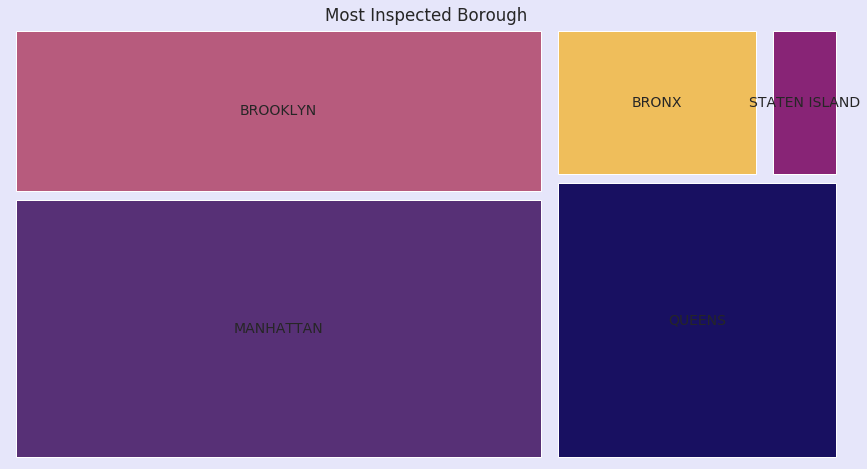

In [42]:
plt.figure(figsize=(15,8))
plt.title('Most Inspected Borough')
squarify.plot(sizes=borough_counts,label=borough_counts.index,pad=True,color=['#573076','#b75b7d','#181061','#efbe5b','#882476'])
plt.axis('off')
plt.show()

Manhattan is the most inspected borough while Staten Island is the least inspected.

**Number of restaurants per borough**

In [43]:
restaurant_inspections_df.groupby('boro').agg({'dba':'count'}).sort_values(by='dba',ascending=False)

,dba
boro,
MANHATTAN,123824
BROOKLYN,78325
QUEENS,71542
BRONX,28042
STATEN ISLAND,10345


Manhattan has the highest number of restaurants while Staten has the least number of restaurants. This can explain why it is the most inspected borough in NYC.

In [44]:
import jovian

# **Inspections:**

 **How many inspections were done monthly, weekly, daily?**

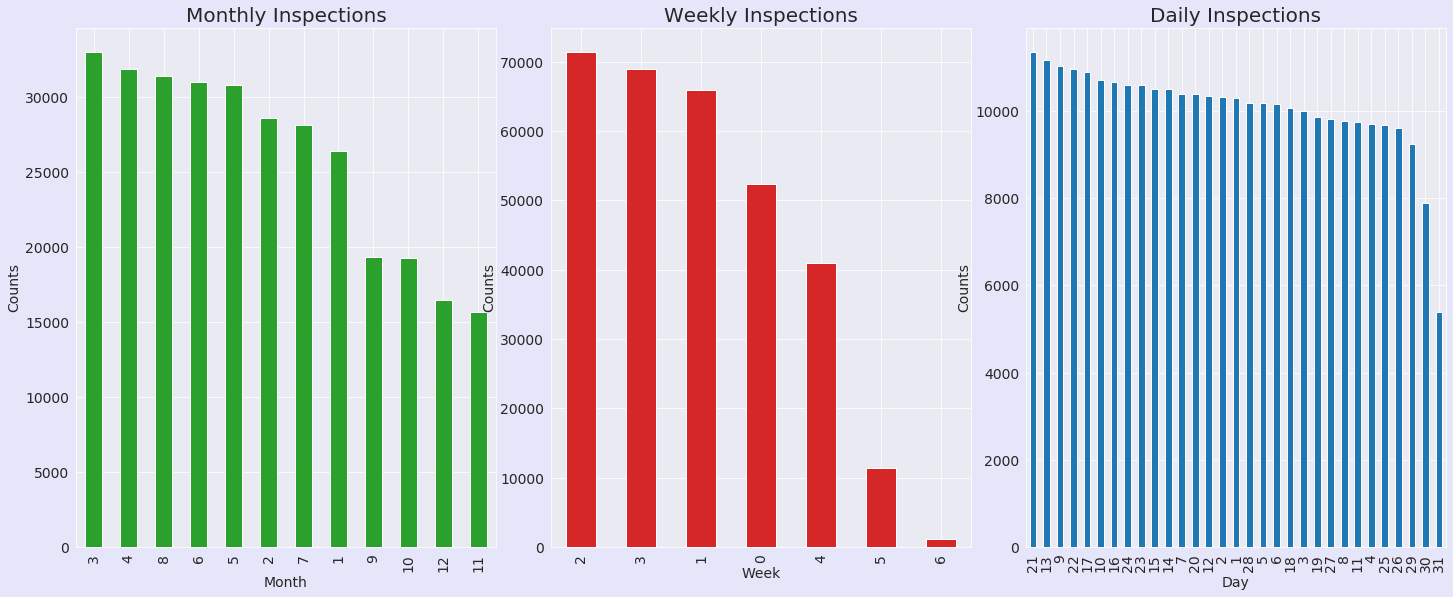

In [46]:
fig, axes = plt.subplots(1,3, figsize=(20,8))
fig.tight_layout(h_pad =5)

axes[0].set_title('Monthly Inspections',fontsize=20)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Counts')
restaurant_inspections_df.month.value_counts().plot(kind='bar',ax=axes[0],color='tab:green');

axes[1].set_title('Weekly Inspections',fontsize=20)
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Counts')
restaurant_inspections_df.weekday.value_counts().plot(kind='bar',ax=axes[1],color='tab:red');

axes[2].set_title('Daily Inspections',fontsize=20)
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Counts')
restaurant_inspections_df.day.value_counts().plot(kind='bar',ax=axes[2],color ='tab:blue');


**What are the different grades given during inspection?**

In [47]:
restaurant_inspections_df.grade.unique()

array([nan, 'C', 'A', 'B', 'Z', 'Not Yet Graded', 'P'], dtype=object)

**Distribution of grades**

Text(0.5, 0, 'Grades')

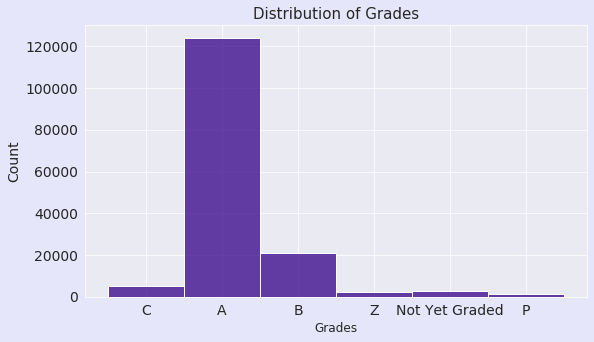

In [48]:
sns.histplot(restaurant_inspections_df.grade,color='#340087')
plt.title('Distribution of Grades',fontsize= 15)
plt.xlabel('Grades',fontsize= 12)


A majority of the restaurants were given grade A which is very good.

**How are the grades distributed in each borough?**

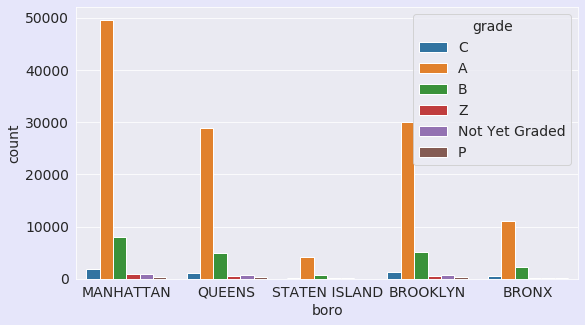

In [49]:
sns.countplot(x='boro',hue='grade',data=restaurant_inspections_df);

The most dominant grade in each borough is grade A.

**Which types of inspections are carried out?**

In [50]:
#Extract the specific inspection types from the inspection type column and creating a column for it.
restaurant_inspections_df['specific_inspection']=restaurant_inspections_df['inspection_type'].str.split(' / ').str[1]
restaurant_inspections_df.specific_inspection.unique()


array(['Initial Inspection', 'Compliance Inspection', 'Re-inspection',
       'Reopening Inspection', 'Second Compliance Inspection',
       'Limited Inspection'], dtype=object)

**What are the counts for each of the inspection types?**

In [51]:
inspection_type_count = pd.DataFrame(restaurant_inspections_df.specific_inspection.value_counts(normalize=True))

In [52]:
inspection_type_count

,specific_inspection
Initial Inspection,0.698120
Re-inspection,0.284310
Reopening Inspection,0.010222
Compliance Inspection,0.006998
Second Compliance Inspection,0.000340
Limited Inspection,0.000010


**How are the grades distributed among the different inspection types?**

In [53]:
pd.crosstab(restaurant_inspections_df.grade,restaurant_inspections_df.specific_inspection,normalize=True)

specific_inspection,Compliance Inspection,Initial Inspection,Re-inspection,Reopening Inspection
grade,,,,
A,0.000000,0.441467,0.352938,0.000038
B,0.000000,0.000000,0.135149,0.000013
C,0.000000,0.000000,0.030215,0.002352
Not Yet Graded,0.000006,0.016091,0.000538,0.000013
P,0.000000,0.000000,0.000000,0.007696
Z,0.000000,0.000019,0.011029,0.002435


Text(0.5, 1.0, 'Grade Distribution by Inspection Type')

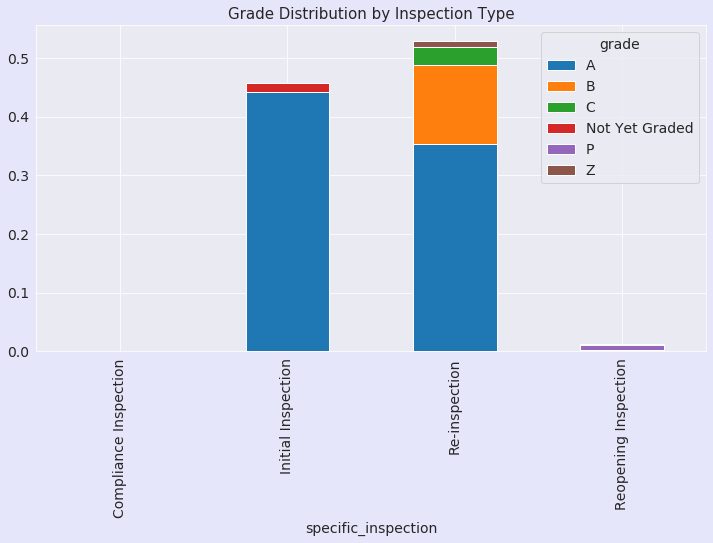

In [54]:
pd.crosstab(restaurant_inspections_df.specific_inspection,restaurant_inspections_df.grade,normalize=True).plot(kind='bar', figsize=(12,6), stacked=True)
plt.title('Grade Distribution by Inspection Type', fontsize = 15)

**What are the mean, min and max scores given?**

In [55]:
mean_score =restaurant_inspections_df.score.mean()
min_score =restaurant_inspections_df.score.min()
max_score = restaurant_inspections_df.score.max()

In [56]:
print('The mean score of the inspection is {} , the minimum score is {} and the maximum score given is {}.'.format(int(mean_score), int(min_score),int(max_score)))

The mean score of the inspection is 18 , the minimum score is -2 and the maximum score given is 151.


The scores seems to have extreme values. Let's visualize the score data.

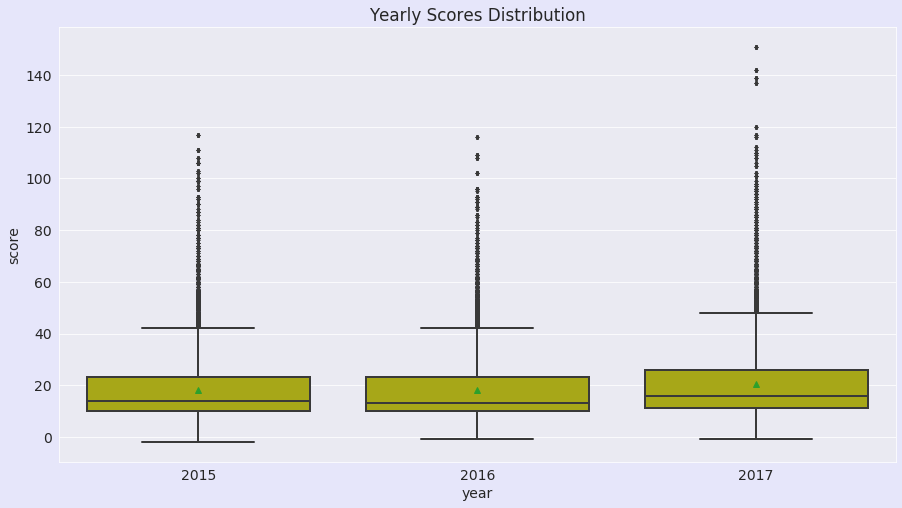

In [57]:
plt.figure(figsize=(15,8))
plt.title('Yearly Scores Distribution')
sns.boxplot(x='year',y='score',data= restaurant_inspections_df,
            linewidth=2,showmeans=True,color='y',fliersize=3);

**Grades and scores**

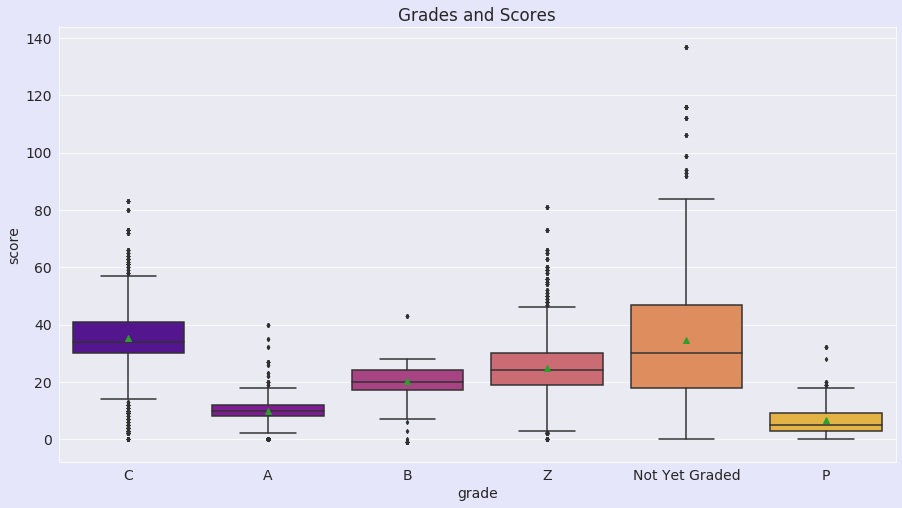

In [58]:
plt.figure(figsize=(15,8))
plt.title('Grades and Scores')
sns.boxplot(y='score',x='grade',data=restaurant_inspections_df,showmeans=True,palette='plasma',fliersize=3);

# **Violations:**

**What actions were taken during the inspection?**

In [61]:
restaurant_inspections_df.action.value_counts()

Violations were cited in the following area(s).                                                                                        298167
Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.      7341
No violations were recorded at the time of this inspection.                                                                              3742
Establishment re-opened by DOHMH                                                                                                         2171
Establishment re-closed by DOHMH                                                                                                          657
Name: action, dtype: int64

**Violation Description**

In [62]:
pip install wordcloud

In [63]:
from wordcloud import WordCloud

In [64]:
text = ''.join((desc for desc in restaurant_inspections_df.violation_description.dropna().str.replace('nan','')))

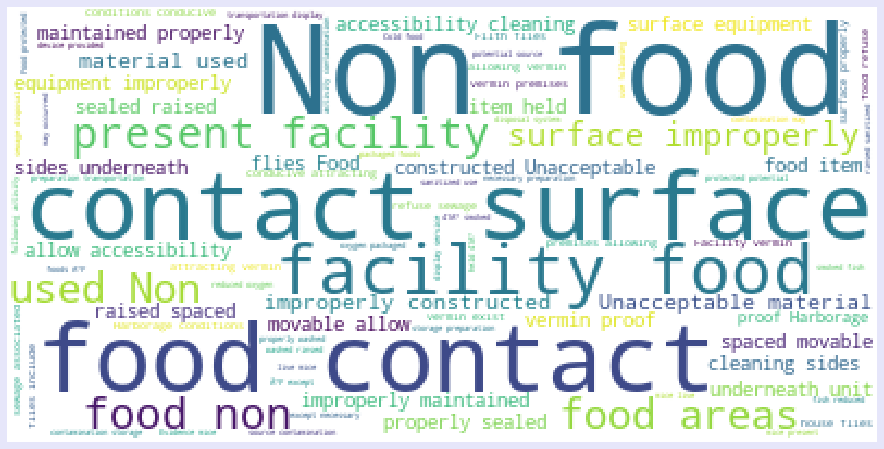

In [65]:
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(16,8))
plt.axis('off')
plt.grid(False)
plt.imshow(wordcloud);

Most violations involved food contact,contact surface and non food.

**What are the counts of critical flags given during restaurant inspection?**

In [66]:
critical_counts = restaurant_inspections_df.critical_flag.value_counts()

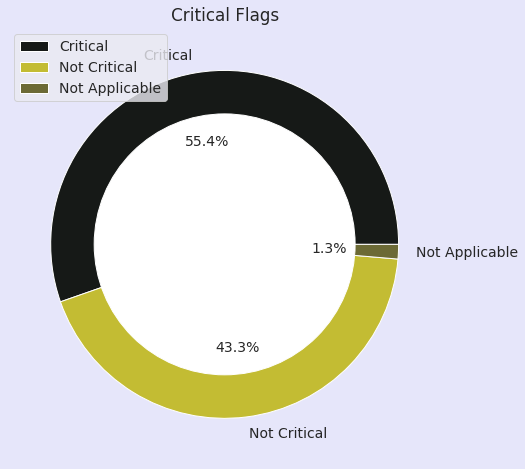

In [67]:
plt.figure(figsize=(15,8))
plt.title('Critical Flags')
plt.pie(critical_counts, labels=critical_counts.index, autopct='%1.1f%%',colors=['#161917','#c3bc33','#6c6a35']);
plt.legend(loc='upper left')
circle= plt.Circle(xy=(0,0),radius=.75,facecolor='white')
plt.gca().add_artist(circle)
plt.show()

**Which violations are associated with critical flag of critical?**

In [68]:
critical_violations = restaurant_inspections_df[(restaurant_inspections_df.critical_flag == 'Critical')]


In [69]:
critical_violations['violation_description'].value_counts().sort_values(ascending=False).head(10)


Food not protected from potential source of contamination during storage, preparation, transportation, display or service.                                                                                                                                                                           21808
Evidence of mice or live mice present in facility's food and/or non-food areas.                                                                                                                                                                                                                      21759
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                                                                                                       21038
Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except du

In [74]:
words = ''.join((desc for desc in critical_violations.violation_description.dropna().str.replace('nan','')))

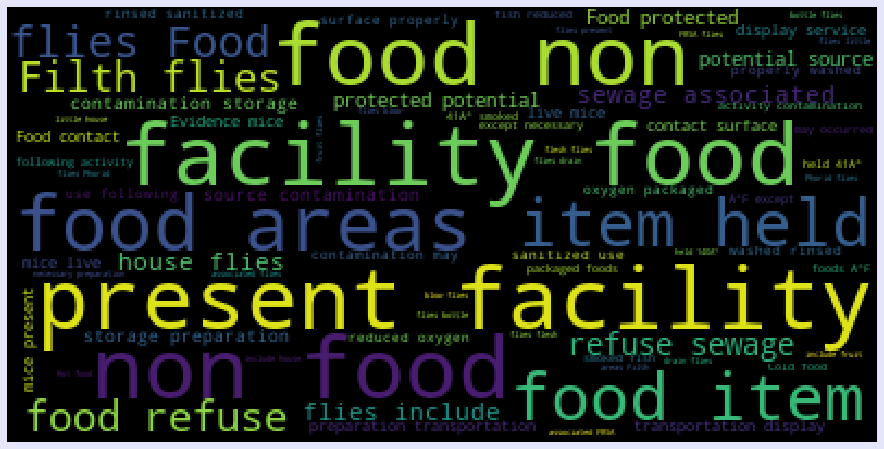

In [71]:
wordcloud = WordCloud(background_color='black').generate(words)
plt.figure(figsize=(16,8))
plt.axis('off')
plt.grid(False)
plt.imshow(wordcloud);

# **Summary:**

From the analysis: 
* NYC restarants are quite compliant with safety regulations. Most restaurants scored grade A.
* The distribution of inspection is balanced throughout the year,month and day of the week.
* The most inspected borough is Manhattan. It has also the highest number of restaurants.





# **Future Work:**

Ideas to explore further:
* Use maps to see the distribution of various inspection types,grades and violations in different locations of New York.
* Explore cuisine types and grade using a better dataset.
*Carry out the same analysis per year to see the inspection trends.

# **References:**

These are useful links that were helpful for this project.<br>
https://jovian.ai/learn/zero-to-data-analyst-bootcamp/assignment/project-2-exploratory-data-analysis
https://www1.nyc.gov/site/doh/services/restaurant-grades.page 
https://www1.nyc.gov/assets/doh/downloads/pdf/rii/inspection-cycle-overview.pdf